In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
import cv2 
import os

In [2]:
image_arr = []
mask_arr = []

for root,dirs,files in os.walk("KMCDATAExtracted"):
    path = root.split(os.path.sep)[-1]
    if (path == "img"):
        images = os.listdir(root)
        for i,image_name in enumerate(images):
            if image_name.endswith(".png"):
                image_arr.append(root + "\\" + image_name)
                
                
    elif (path == "mask"):
        images = os.listdir(root)
        for i,image_name in enumerate(images):
            if image_name.endswith(".png"):
                mask_arr.append(root + "\\" + image_name)

In [3]:
print(len(image_arr))
print(len(mask_arr))

6600
6600


In [4]:
image_dataset = []
mask_dataset = []

for i in range(len(image_arr)):
    
    image = cv2.imread(image_arr[i],1)
    mask = cv2.imread(mask_arr[i],1)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    
    if (cv2.countNonZero(gray) == 0):
    
        print("****** Ignoring " + image_arr[i] + "******")
        
    else :
        
        #   cropping

        _,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnt = max(contours, key = cv2.contourArea, default = 0)
        x,y,w,h = cv2.boundingRect(cnt)
    
        crop_img = image[y:y+h,x:x+w]
        crop_mask = mask[y:y+h,x:x+w]
        crop_mask[crop_mask>0]=255
    
        label_img = image_arr[i].split("\\")
        label_mask = mask_arr[i].split("\\")
    
        path_img = "new_data" + "\\" + label_img[1] + "\\" + label_img[2] + "\\" + label_img[3]
        path_mask = "new_data" + "\\" + label_mask[1] + "\\" + label_mask[2] + "\\" + label_mask[3]
    
        cv2.imwrite(path_img, crop_img)
        cv2.imwrite(path_mask, crop_mask)

        print(image_arr[i])
        print(mask_arr[i])
        
        image = np.array(image)
        mask = np.array(mask)
        
        image_dataset.append(image)
        mask_dataset.append(mask)

****** Ignoring KMCDATAExtracted\1\img\1_left_image_00000.png******
KMCDATAExtracted\1\img\1_left_image_00001.png
KMCDATAExtracted\1\mask\1_left_mask_00001.png
KMCDATAExtracted\1\img\1_left_image_00002.png
KMCDATAExtracted\1\mask\1_left_mask_00002.png
KMCDATAExtracted\1\img\1_left_image_00003.png
KMCDATAExtracted\1\mask\1_left_mask_00003.png
KMCDATAExtracted\1\img\1_left_image_00004.png
KMCDATAExtracted\1\mask\1_left_mask_00004.png
KMCDATAExtracted\1\img\1_left_image_00005.png
KMCDATAExtracted\1\mask\1_left_mask_00005.png
KMCDATAExtracted\1\img\1_left_image_00006.png
KMCDATAExtracted\1\mask\1_left_mask_00006.png
KMCDATAExtracted\1\img\1_left_image_00007.png
KMCDATAExtracted\1\mask\1_left_mask_00007.png
KMCDATAExtracted\1\img\1_left_image_00008.png
KMCDATAExtracted\1\mask\1_left_mask_00008.png
KMCDATAExtracted\1\img\1_left_image_00009.png
KMCDATAExtracted\1\mask\1_left_mask_00009.png
KMCDATAExtracted\1\img\1_left_image_00010.png
KMCDATAExtracted\1\mask\1_left_mask_00010.png
KMCDATAExtra

KMCDATAExtracted\1\img\1_left_image_00090.png
KMCDATAExtracted\1\mask\1_left_mask_00090.png
KMCDATAExtracted\1\img\1_left_image_00091.png
KMCDATAExtracted\1\mask\1_left_mask_00091.png
KMCDATAExtracted\1\img\1_left_image_00092.png
KMCDATAExtracted\1\mask\1_left_mask_00092.png
KMCDATAExtracted\1\img\1_left_image_00093.png
KMCDATAExtracted\1\mask\1_left_mask_00093.png
KMCDATAExtracted\1\img\1_left_image_00094.png
KMCDATAExtracted\1\mask\1_left_mask_00094.png
KMCDATAExtracted\1\img\1_left_image_00095.png
KMCDATAExtracted\1\mask\1_left_mask_00095.png
KMCDATAExtracted\1\img\1_left_image_00096.png
KMCDATAExtracted\1\mask\1_left_mask_00096.png
KMCDATAExtracted\1\img\1_left_image_00097.png
KMCDATAExtracted\1\mask\1_left_mask_00097.png
KMCDATAExtracted\1\img\1_left_image_00098.png
KMCDATAExtracted\1\mask\1_left_mask_00098.png
KMCDATAExtracted\1\img\1_left_image_00099.png
KMCDATAExtracted\1\mask\1_left_mask_00099.png
KMCDATAExtracted\1\img\1_left_image_00100.png
KMCDATAExtracted\1\mask\1_left_mas

KMCDATAExtracted\1\img\1_left_image_00180.png
KMCDATAExtracted\1\mask\1_left_mask_00180.png
KMCDATAExtracted\1\img\1_left_image_00181.png
KMCDATAExtracted\1\mask\1_left_mask_00181.png
KMCDATAExtracted\1\img\1_left_image_00182.png
KMCDATAExtracted\1\mask\1_left_mask_00182.png
KMCDATAExtracted\1\img\1_left_image_00183.png
KMCDATAExtracted\1\mask\1_left_mask_00183.png
KMCDATAExtracted\1\img\1_left_image_00184.png
KMCDATAExtracted\1\mask\1_left_mask_00184.png
KMCDATAExtracted\1\img\1_left_image_00185.png
KMCDATAExtracted\1\mask\1_left_mask_00185.png
KMCDATAExtracted\1\img\1_left_image_00186.png
KMCDATAExtracted\1\mask\1_left_mask_00186.png
KMCDATAExtracted\1\img\1_left_image_00187.png
KMCDATAExtracted\1\mask\1_left_mask_00187.png
KMCDATAExtracted\1\img\1_left_image_00188.png
KMCDATAExtracted\1\mask\1_left_mask_00188.png
KMCDATAExtracted\1\img\1_left_image_00189.png
KMCDATAExtracted\1\mask\1_left_mask_00189.png
KMCDATAExtracted\1\img\1_left_image_00190.png
KMCDATAExtracted\1\mask\1_left_mas

KMCDATAExtracted\1\img\1_left_image_00270.png
KMCDATAExtracted\1\mask\1_left_mask_00270.png
KMCDATAExtracted\1\img\1_left_image_00271.png
KMCDATAExtracted\1\mask\1_left_mask_00271.png
KMCDATAExtracted\1\img\1_left_image_00272.png
KMCDATAExtracted\1\mask\1_left_mask_00272.png
KMCDATAExtracted\1\img\1_left_image_00273.png
KMCDATAExtracted\1\mask\1_left_mask_00273.png
KMCDATAExtracted\1\img\1_left_image_00274.png
KMCDATAExtracted\1\mask\1_left_mask_00274.png
KMCDATAExtracted\1\img\1_left_image_00275.png
KMCDATAExtracted\1\mask\1_left_mask_00275.png
KMCDATAExtracted\1\img\1_left_image_00276.png
KMCDATAExtracted\1\mask\1_left_mask_00276.png
KMCDATAExtracted\1\img\1_left_image_00277.png
KMCDATAExtracted\1\mask\1_left_mask_00277.png
KMCDATAExtracted\1\img\1_left_image_00278.png
KMCDATAExtracted\1\mask\1_left_mask_00278.png
KMCDATAExtracted\1\img\1_left_image_00279.png
KMCDATAExtracted\1\mask\1_left_mask_00279.png
KMCDATAExtracted\1\img\1_left_image_00280.png
KMCDATAExtracted\1\mask\1_left_mas

KMCDATAExtracted\1\img\1_left_image_00361.png
KMCDATAExtracted\1\mask\1_left_mask_00361.png
KMCDATAExtracted\1\img\1_left_image_00362.png
KMCDATAExtracted\1\mask\1_left_mask_00362.png
KMCDATAExtracted\1\img\1_left_image_00363.png
KMCDATAExtracted\1\mask\1_left_mask_00363.png
KMCDATAExtracted\1\img\1_left_image_00364.png
KMCDATAExtracted\1\mask\1_left_mask_00364.png
KMCDATAExtracted\1\img\1_left_image_00365.png
KMCDATAExtracted\1\mask\1_left_mask_00365.png
KMCDATAExtracted\1\img\1_left_image_00366.png
KMCDATAExtracted\1\mask\1_left_mask_00366.png
KMCDATAExtracted\1\img\1_left_image_00367.png
KMCDATAExtracted\1\mask\1_left_mask_00367.png
KMCDATAExtracted\1\img\1_left_image_00368.png
KMCDATAExtracted\1\mask\1_left_mask_00368.png
KMCDATAExtracted\1\img\1_left_image_00369.png
KMCDATAExtracted\1\mask\1_left_mask_00369.png
KMCDATAExtracted\1\img\1_left_image_00370.png
KMCDATAExtracted\1\mask\1_left_mask_00370.png
KMCDATAExtracted\1\img\1_left_image_00371.png
KMCDATAExtracted\1\mask\1_left_mas

KMCDATAExtracted\1\img\1_left_image_00452.png
KMCDATAExtracted\1\mask\1_left_mask_00452.png
KMCDATAExtracted\1\img\1_left_image_00453.png
KMCDATAExtracted\1\mask\1_left_mask_00453.png
KMCDATAExtracted\1\img\1_left_image_00454.png
KMCDATAExtracted\1\mask\1_left_mask_00454.png
KMCDATAExtracted\1\img\1_left_image_00455.png
KMCDATAExtracted\1\mask\1_left_mask_00455.png
KMCDATAExtracted\1\img\1_left_image_00456.png
KMCDATAExtracted\1\mask\1_left_mask_00456.png
KMCDATAExtracted\1\img\1_left_image_00457.png
KMCDATAExtracted\1\mask\1_left_mask_00457.png
KMCDATAExtracted\1\img\1_left_image_00458.png
KMCDATAExtracted\1\mask\1_left_mask_00458.png
KMCDATAExtracted\1\img\1_left_image_00459.png
KMCDATAExtracted\1\mask\1_left_mask_00459.png
KMCDATAExtracted\1\img\1_left_image_00460.png
KMCDATAExtracted\1\mask\1_left_mask_00460.png
KMCDATAExtracted\1\img\1_left_image_00461.png
KMCDATAExtracted\1\mask\1_left_mask_00461.png
KMCDATAExtracted\1\img\1_left_image_00462.png
KMCDATAExtracted\1\mask\1_left_mas

KMCDATAExtracted\1\img\1_left_image_00543.png
KMCDATAExtracted\1\mask\1_left_mask_00543.png
KMCDATAExtracted\1\img\1_left_image_00544.png
KMCDATAExtracted\1\mask\1_left_mask_00544.png
KMCDATAExtracted\1\img\1_left_image_00545.png
KMCDATAExtracted\1\mask\1_left_mask_00545.png
KMCDATAExtracted\1\img\1_left_image_00546.png
KMCDATAExtracted\1\mask\1_left_mask_00546.png
KMCDATAExtracted\1\img\1_left_image_00547.png
KMCDATAExtracted\1\mask\1_left_mask_00547.png
KMCDATAExtracted\1\img\1_left_image_00548.png
KMCDATAExtracted\1\mask\1_left_mask_00548.png
KMCDATAExtracted\1\img\1_left_image_00549.png
KMCDATAExtracted\1\mask\1_left_mask_00549.png
KMCDATAExtracted\1\img\1_left_image_00550.png
KMCDATAExtracted\1\mask\1_left_mask_00550.png
KMCDATAExtracted\1\img\1_left_image_00551.png
KMCDATAExtracted\1\mask\1_left_mask_00551.png
KMCDATAExtracted\1\img\1_left_image_00552.png
KMCDATAExtracted\1\mask\1_left_mask_00552.png
KMCDATAExtracted\1\img\1_left_image_00553.png
KMCDATAExtracted\1\mask\1_left_mas

KMCDATAExtracted\1\img\1_right_image_00061.png
KMCDATAExtracted\1\mask\1_right_mask_00061.png
KMCDATAExtracted\1\img\1_right_image_00062.png
KMCDATAExtracted\1\mask\1_right_mask_00062.png
KMCDATAExtracted\1\img\1_right_image_00063.png
KMCDATAExtracted\1\mask\1_right_mask_00063.png
KMCDATAExtracted\1\img\1_right_image_00064.png
KMCDATAExtracted\1\mask\1_right_mask_00064.png
KMCDATAExtracted\1\img\1_right_image_00065.png
KMCDATAExtracted\1\mask\1_right_mask_00065.png
KMCDATAExtracted\1\img\1_right_image_00066.png
KMCDATAExtracted\1\mask\1_right_mask_00066.png
KMCDATAExtracted\1\img\1_right_image_00067.png
KMCDATAExtracted\1\mask\1_right_mask_00067.png
KMCDATAExtracted\1\img\1_right_image_00068.png
KMCDATAExtracted\1\mask\1_right_mask_00068.png
KMCDATAExtracted\1\img\1_right_image_00069.png
KMCDATAExtracted\1\mask\1_right_mask_00069.png
KMCDATAExtracted\1\img\1_right_image_00070.png
KMCDATAExtracted\1\mask\1_right_mask_00070.png
KMCDATAExtracted\1\img\1_right_image_00071.png
KMCDATAExtrac

KMCDATAExtracted\1\img\1_right_image_00151.png
KMCDATAExtracted\1\mask\1_right_mask_00151.png
KMCDATAExtracted\1\img\1_right_image_00152.png
KMCDATAExtracted\1\mask\1_right_mask_00152.png
KMCDATAExtracted\1\img\1_right_image_00153.png
KMCDATAExtracted\1\mask\1_right_mask_00153.png
KMCDATAExtracted\1\img\1_right_image_00154.png
KMCDATAExtracted\1\mask\1_right_mask_00154.png
KMCDATAExtracted\1\img\1_right_image_00155.png
KMCDATAExtracted\1\mask\1_right_mask_00155.png
KMCDATAExtracted\1\img\1_right_image_00156.png
KMCDATAExtracted\1\mask\1_right_mask_00156.png
KMCDATAExtracted\1\img\1_right_image_00157.png
KMCDATAExtracted\1\mask\1_right_mask_00157.png
KMCDATAExtracted\1\img\1_right_image_00158.png
KMCDATAExtracted\1\mask\1_right_mask_00158.png
KMCDATAExtracted\1\img\1_right_image_00159.png
KMCDATAExtracted\1\mask\1_right_mask_00159.png
KMCDATAExtracted\1\img\1_right_image_00160.png
KMCDATAExtracted\1\mask\1_right_mask_00160.png
KMCDATAExtracted\1\img\1_right_image_00161.png
KMCDATAExtrac

KMCDATAExtracted\1\img\1_right_image_00239.png
KMCDATAExtracted\1\mask\1_right_mask_00239.png
KMCDATAExtracted\1\img\1_right_image_00240.png
KMCDATAExtracted\1\mask\1_right_mask_00240.png
KMCDATAExtracted\1\img\1_right_image_00241.png
KMCDATAExtracted\1\mask\1_right_mask_00241.png
KMCDATAExtracted\1\img\1_right_image_00242.png
KMCDATAExtracted\1\mask\1_right_mask_00242.png
KMCDATAExtracted\1\img\1_right_image_00243.png
KMCDATAExtracted\1\mask\1_right_mask_00243.png
KMCDATAExtracted\1\img\1_right_image_00244.png
KMCDATAExtracted\1\mask\1_right_mask_00244.png
KMCDATAExtracted\1\img\1_right_image_00245.png
KMCDATAExtracted\1\mask\1_right_mask_00245.png
KMCDATAExtracted\1\img\1_right_image_00246.png
KMCDATAExtracted\1\mask\1_right_mask_00246.png
KMCDATAExtracted\1\img\1_right_image_00247.png
KMCDATAExtracted\1\mask\1_right_mask_00247.png
KMCDATAExtracted\1\img\1_right_image_00248.png
KMCDATAExtracted\1\mask\1_right_mask_00248.png
KMCDATAExtracted\1\img\1_right_image_00249.png
KMCDATAExtrac

KMCDATAExtracted\1\img\1_right_image_00327.png
KMCDATAExtracted\1\mask\1_right_mask_00327.png
KMCDATAExtracted\1\img\1_right_image_00328.png
KMCDATAExtracted\1\mask\1_right_mask_00328.png
KMCDATAExtracted\1\img\1_right_image_00329.png
KMCDATAExtracted\1\mask\1_right_mask_00329.png
KMCDATAExtracted\1\img\1_right_image_00330.png
KMCDATAExtracted\1\mask\1_right_mask_00330.png
KMCDATAExtracted\1\img\1_right_image_00331.png
KMCDATAExtracted\1\mask\1_right_mask_00331.png
KMCDATAExtracted\1\img\1_right_image_00332.png
KMCDATAExtracted\1\mask\1_right_mask_00332.png
KMCDATAExtracted\1\img\1_right_image_00333.png
KMCDATAExtracted\1\mask\1_right_mask_00333.png
KMCDATAExtracted\1\img\1_right_image_00334.png
KMCDATAExtracted\1\mask\1_right_mask_00334.png
KMCDATAExtracted\1\img\1_right_image_00335.png
KMCDATAExtracted\1\mask\1_right_mask_00335.png
KMCDATAExtracted\1\img\1_right_image_00336.png
KMCDATAExtracted\1\mask\1_right_mask_00336.png
KMCDATAExtracted\1\img\1_right_image_00337.png
KMCDATAExtrac

KMCDATAExtracted\1\img\1_right_image_00423.png
KMCDATAExtracted\1\mask\1_right_mask_00423.png
KMCDATAExtracted\1\img\1_right_image_00424.png
KMCDATAExtracted\1\mask\1_right_mask_00424.png
KMCDATAExtracted\1\img\1_right_image_00425.png
KMCDATAExtracted\1\mask\1_right_mask_00425.png
KMCDATAExtracted\1\img\1_right_image_00426.png
KMCDATAExtracted\1\mask\1_right_mask_00426.png
KMCDATAExtracted\1\img\1_right_image_00427.png
KMCDATAExtracted\1\mask\1_right_mask_00427.png
KMCDATAExtracted\1\img\1_right_image_00428.png
KMCDATAExtracted\1\mask\1_right_mask_00428.png
KMCDATAExtracted\1\img\1_right_image_00429.png
KMCDATAExtracted\1\mask\1_right_mask_00429.png
KMCDATAExtracted\1\img\1_right_image_00430.png
KMCDATAExtracted\1\mask\1_right_mask_00430.png
KMCDATAExtracted\1\img\1_right_image_00431.png
KMCDATAExtracted\1\mask\1_right_mask_00431.png
KMCDATAExtracted\1\img\1_right_image_00432.png
KMCDATAExtracted\1\mask\1_right_mask_00432.png
KMCDATAExtracted\1\img\1_right_image_00433.png
KMCDATAExtrac

KMCDATAExtracted\1\img\1_right_image_00523.png
KMCDATAExtracted\1\mask\1_right_mask_00523.png
KMCDATAExtracted\1\img\1_right_image_00524.png
KMCDATAExtracted\1\mask\1_right_mask_00524.png
KMCDATAExtracted\1\img\1_right_image_00525.png
KMCDATAExtracted\1\mask\1_right_mask_00525.png
KMCDATAExtracted\1\img\1_right_image_00526.png
KMCDATAExtracted\1\mask\1_right_mask_00526.png
KMCDATAExtracted\1\img\1_right_image_00527.png
KMCDATAExtracted\1\mask\1_right_mask_00527.png
KMCDATAExtracted\1\img\1_right_image_00528.png
KMCDATAExtracted\1\mask\1_right_mask_00528.png
KMCDATAExtracted\1\img\1_right_image_00529.png
KMCDATAExtracted\1\mask\1_right_mask_00529.png
KMCDATAExtracted\1\img\1_right_image_00530.png
KMCDATAExtracted\1\mask\1_right_mask_00530.png
KMCDATAExtracted\1\img\1_right_image_00531.png
KMCDATAExtracted\1\mask\1_right_mask_00531.png
KMCDATAExtracted\1\img\1_right_image_00532.png
KMCDATAExtracted\1\mask\1_right_mask_00532.png
KMCDATAExtracted\1\img\1_right_image_00533.png
KMCDATAExtrac

****** Ignoring KMCDATAExtracted\2\img\2_left_image_00038.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00039.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00040.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00041.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00042.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00043.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00044.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00045.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00046.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00047.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00048.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00049.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00050.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00051.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_im

KMCDATAExtracted\2\img\2_left_image_00133.png
KMCDATAExtracted\2\mask\2_left_mask_00133.png
KMCDATAExtracted\2\img\2_left_image_00134.png
KMCDATAExtracted\2\mask\2_left_mask_00134.png
KMCDATAExtracted\2\img\2_left_image_00135.png
KMCDATAExtracted\2\mask\2_left_mask_00135.png
KMCDATAExtracted\2\img\2_left_image_00136.png
KMCDATAExtracted\2\mask\2_left_mask_00136.png
KMCDATAExtracted\2\img\2_left_image_00137.png
KMCDATAExtracted\2\mask\2_left_mask_00137.png
KMCDATAExtracted\2\img\2_left_image_00138.png
KMCDATAExtracted\2\mask\2_left_mask_00138.png
KMCDATAExtracted\2\img\2_left_image_00139.png
KMCDATAExtracted\2\mask\2_left_mask_00139.png
KMCDATAExtracted\2\img\2_left_image_00140.png
KMCDATAExtracted\2\mask\2_left_mask_00140.png
KMCDATAExtracted\2\img\2_left_image_00141.png
KMCDATAExtracted\2\mask\2_left_mask_00141.png
KMCDATAExtracted\2\img\2_left_image_00142.png
KMCDATAExtracted\2\mask\2_left_mask_00142.png
KMCDATAExtracted\2\img\2_left_image_00143.png
KMCDATAExtracted\2\mask\2_left_mas

KMCDATAExtracted\2\img\2_left_image_00223.png
KMCDATAExtracted\2\mask\2_left_mask_00223.png
KMCDATAExtracted\2\img\2_left_image_00224.png
KMCDATAExtracted\2\mask\2_left_mask_00224.png
KMCDATAExtracted\2\img\2_left_image_00225.png
KMCDATAExtracted\2\mask\2_left_mask_00225.png
KMCDATAExtracted\2\img\2_left_image_00226.png
KMCDATAExtracted\2\mask\2_left_mask_00226.png
KMCDATAExtracted\2\img\2_left_image_00227.png
KMCDATAExtracted\2\mask\2_left_mask_00227.png
KMCDATAExtracted\2\img\2_left_image_00228.png
KMCDATAExtracted\2\mask\2_left_mask_00228.png
KMCDATAExtracted\2\img\2_left_image_00229.png
KMCDATAExtracted\2\mask\2_left_mask_00229.png
KMCDATAExtracted\2\img\2_left_image_00230.png
KMCDATAExtracted\2\mask\2_left_mask_00230.png
KMCDATAExtracted\2\img\2_left_image_00231.png
KMCDATAExtracted\2\mask\2_left_mask_00231.png
KMCDATAExtracted\2\img\2_left_image_00232.png
KMCDATAExtracted\2\mask\2_left_mask_00232.png
KMCDATAExtracted\2\img\2_left_image_00233.png
KMCDATAExtracted\2\mask\2_left_mas

KMCDATAExtracted\2\img\2_left_image_00314.png
KMCDATAExtracted\2\mask\2_left_mask_00314.png
KMCDATAExtracted\2\img\2_left_image_00315.png
KMCDATAExtracted\2\mask\2_left_mask_00315.png
KMCDATAExtracted\2\img\2_left_image_00316.png
KMCDATAExtracted\2\mask\2_left_mask_00316.png
KMCDATAExtracted\2\img\2_left_image_00317.png
KMCDATAExtracted\2\mask\2_left_mask_00317.png
KMCDATAExtracted\2\img\2_left_image_00318.png
KMCDATAExtracted\2\mask\2_left_mask_00318.png
KMCDATAExtracted\2\img\2_left_image_00319.png
KMCDATAExtracted\2\mask\2_left_mask_00319.png
KMCDATAExtracted\2\img\2_left_image_00320.png
KMCDATAExtracted\2\mask\2_left_mask_00320.png
KMCDATAExtracted\2\img\2_left_image_00321.png
KMCDATAExtracted\2\mask\2_left_mask_00321.png
KMCDATAExtracted\2\img\2_left_image_00322.png
KMCDATAExtracted\2\mask\2_left_mask_00322.png
KMCDATAExtracted\2\img\2_left_image_00323.png
KMCDATAExtracted\2\mask\2_left_mask_00323.png
KMCDATAExtracted\2\img\2_left_image_00324.png
KMCDATAExtracted\2\mask\2_left_mas

KMCDATAExtracted\2\img\2_left_image_00404.png
KMCDATAExtracted\2\mask\2_left_mask_00404.png
KMCDATAExtracted\2\img\2_left_image_00405.png
KMCDATAExtracted\2\mask\2_left_mask_00405.png
KMCDATAExtracted\2\img\2_left_image_00406.png
KMCDATAExtracted\2\mask\2_left_mask_00406.png
KMCDATAExtracted\2\img\2_left_image_00407.png
KMCDATAExtracted\2\mask\2_left_mask_00407.png
KMCDATAExtracted\2\img\2_left_image_00408.png
KMCDATAExtracted\2\mask\2_left_mask_00408.png
KMCDATAExtracted\2\img\2_left_image_00409.png
KMCDATAExtracted\2\mask\2_left_mask_00409.png
KMCDATAExtracted\2\img\2_left_image_00410.png
KMCDATAExtracted\2\mask\2_left_mask_00410.png
KMCDATAExtracted\2\img\2_left_image_00411.png
KMCDATAExtracted\2\mask\2_left_mask_00411.png
KMCDATAExtracted\2\img\2_left_image_00412.png
KMCDATAExtracted\2\mask\2_left_mask_00412.png
KMCDATAExtracted\2\img\2_left_image_00413.png
KMCDATAExtracted\2\mask\2_left_mask_00413.png
KMCDATAExtracted\2\img\2_left_image_00414.png
KMCDATAExtracted\2\mask\2_left_mas

KMCDATAExtracted\2\img\2_left_image_00495.png
KMCDATAExtracted\2\mask\2_left_mask_00495.png
KMCDATAExtracted\2\img\2_left_image_00496.png
KMCDATAExtracted\2\mask\2_left_mask_00496.png
KMCDATAExtracted\2\img\2_left_image_00497.png
KMCDATAExtracted\2\mask\2_left_mask_00497.png
KMCDATAExtracted\2\img\2_left_image_00498.png
KMCDATAExtracted\2\mask\2_left_mask_00498.png
KMCDATAExtracted\2\img\2_left_image_00499.png
KMCDATAExtracted\2\mask\2_left_mask_00499.png
KMCDATAExtracted\2\img\2_left_image_00500.png
KMCDATAExtracted\2\mask\2_left_mask_00500.png
KMCDATAExtracted\2\img\2_left_image_00501.png
KMCDATAExtracted\2\mask\2_left_mask_00501.png
KMCDATAExtracted\2\img\2_left_image_00502.png
KMCDATAExtracted\2\mask\2_left_mask_00502.png
KMCDATAExtracted\2\img\2_left_image_00503.png
KMCDATAExtracted\2\mask\2_left_mask_00503.png
KMCDATAExtracted\2\img\2_left_image_00504.png
KMCDATAExtracted\2\mask\2_left_mask_00504.png
KMCDATAExtracted\2\img\2_left_image_00505.png
KMCDATAExtracted\2\mask\2_left_mas

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:874: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::pointSetBoundingRect'


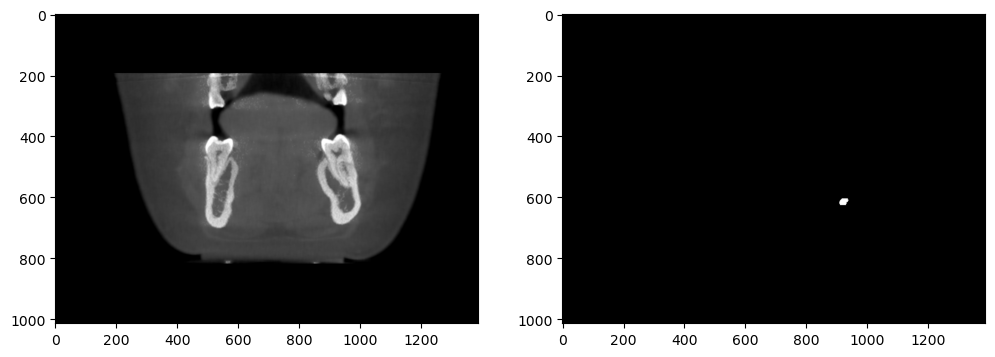

In [5]:
import matplotlib.image as mpimg 
import random
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()

In [6]:
mask_dataset = np.array(mask_dataset, dtype = object)
image_dataset = np.array(image_dataset, dtype = object)

In [7]:
print(mask_dataset.shape)
print(image_dataset.shape)

(1554,)
(1554,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.2, random_state = 0)

In [9]:
from tensorflow.keras.models import Model
def unet_model (n_classes):
    
    input = Input((None, None, 3))

    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(input)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_1)
    pool_1 = MaxPool2D((2,2))(conv_1)
                  
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_1)
    conv_2 = Dropout(0.2)(conv_2)
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_2)
    pool_2 = MaxPool2D((2,2))(conv_2)
                  
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_2)
    conv_3 = Dropout(0.2)(conv_3)
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_3)
    pool_3 = MaxPool2D((2,2))(conv_3)
                  
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_3)
    conv_4 = Dropout(0.2)(conv_4)
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer= "he_normal", padding = "same")(conv_4)
    pool_4 = MaxPool2D((2,2))(conv_4)              
    
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_4)
    conv_5 = Dropout(0.2)(conv_5)
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_5)
     
    conv_6 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(conv_5)
    conv_6 = concatenate([conv_6, conv_4])
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
    conv_6 = Dropout(0.2)(conv_6)
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
                  
    conv_7 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(conv_6)
    conv_7 = concatenate([conv_7, conv_3])
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
    conv_7 = Dropout(0.2)(conv_7)
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
                  
    conv_8 = Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(conv_7)
    conv_8 = concatenate([conv_8, conv_2])
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
    conv_8 = Dropout(0.2)(conv_8)
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
                  
    conv_9 = Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(conv_8)
    conv_9 = concatenate([conv_9, conv_1], axis = 3)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
    conv_9 = Dropout(0.2)(conv_9)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
                  
    output = Conv2D(2, (1,1), activation = "softmax")(conv_9)
                  
    model = Model(inputs = [input], outputs = [output])
                  
    return model

In [10]:
no_classes = 2

In [11]:
X_train.shape

(1243,)

In [12]:
metrics = ["accuracy"]

def get_model ():
    return unet_model(n_classes= no_classes)

In [16]:
model = get_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = metrics)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_19 (Conv2D)             (None, None, None,   448         ['input_2[0][0]']                
                                16)                                                               
                                                                                                  
 dropout_9 (Dropout)            (None, None, None,   0           ['conv2d_19[0][0]']              
                                16)                                                         

                                                                                                  
 conv2d_31 (Conv2D)             (None, None, None,   73792       ['concatenate_5[0][0]']          
                                64)                                                               
                                                                                                  
 dropout_15 (Dropout)           (None, None, None,   0           ['conv2d_31[0][0]']              
                                64)                                                               
                                                                                                  
 conv2d_32 (Conv2D)             (None, None, None,   36928       ['dropout_15[0][0]']             
                                64)                                                               
                                                                                                  
 conv2d_tr

In [17]:
history = model.fit(X_train, Y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [18]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "red", label = "Training Loss")
plt.plot(epochs, val_loss, "blue", label = "Validation Loss")
plt.title("Comparing the training loss and the validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined